## Load CORDEX Data from CDS  API

In [6]:
"""
This script makes calls to the CORDEX API

Data: CORDEX regional climate model data on single levels - Experiment: Historical
Temporal coverage: 1 Jan 1971 to 31 Dec 2000
Spatial coverage: Domain: Africa
Format: NetCDF in zip archives

Data: CORDEX regional climate model data on single levels - Experiment: RCP4.5
Temporal coverage: 1 Jan 2071 to 31 Dec 2100
Spatial coverage: Domain: Africa
Format: NetCDF in zip archives

"""

# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import cartopy.feature as cfeature

# Other libraries (e.g. paths, filenames, zipfile extraction)
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile
import yaml
import urllib3 
urllib3.disable_warnings() # Disable "InsecureRequestWarning" 
                           # for data download via API

import os
from dotenv import load_dotenv

load_dotenv()

URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = os.getenv('CDS_API_KEY')

def call_api(url=URL, key=KEY):
    client = cdsapi.Client(url=url, key=key)
    return client

def retrieve_cordex_hist_proj(client, data_dir):
    client.retrieve(
        'projections-cordex-domains-single-levels',
        {
            'format': 'zip',
            'domain': 'africa',
            'experiment': 'historical',
            'horizontal_resolution': '0_44_degree_x_0_44_degree',
            'temporal_resolution': 'daily_mean',
            'variable': '2m_air_temperature',
            'gcm_model': 'cccma_canesm2',
            'rcm_model': 'cccma_canrcm4',
            'ensemble_member': 'r1i1p1',
            'start_year': ['1971', '1976', '1981', '1986', '1991', '1996'],
            'end_year': ['1975', '1980', '1985', '1990', '1995', '2000'],
        },
        f'{data_dir}1971-2000_cordex_historical_africa.zip')
    
    # client.retrieve(
    #     'projections-cordex-domains-single-levels',
    #     {
    #         'format': 'zip',
    #         'domain': 'africa',
    #         'experiment': 'rcp_4_5',
    #         'horizontal_resolution': '0_44_degree_x_0_44_degree',
    #         'temporal_resolution': 'daily_mean',
    #         'variable': '2m_air_temperature',
    #         'gcm_model': 'cccma_canesm2',
    #         'rcm_model': 'cccma_canrcm4',
    #         'ensemble_member': 'r1i1p1',
    #         'start_year': ['2071', '2076', '2081', '2086', '2091', '2096'],
    #         'end_year': ['2075', '2080', '2085', '2090', '2095', '2100'],
    #     },
    #     f'{data_dir}2071-2100_cordex_rcp_4_5_africa.zip')

def unzip_files(data_dir):
    cordex_zip_paths = glob(f'{data_dir}*.zip')
    for j in cordex_zip_paths:
        with zipfile.ZipFile(j, 'r') as zip_ref:
            zip_ref.extractall(f'{data_dir}')

def load_hist_proj(data_dir):
    hist_data = xr.open_mfdataset(f'{data_dir}*CanESM2_historical*.nc')
    # proj_data = xr.open_mfdataset(f'{data_dir}*CanESM2_rcp45*.nc')
    return hist_data


In [7]:
config_path = os.getenv('CONFIG_PATH', 'config.yaml')
# print(config_path)
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

In [8]:
data_dir = config['data_dir']

In [4]:
def main():
    data_dir = config['data_dir']
    client = call_api()
    retrieve_cordex_hist_proj(client, data_dir)
    unzip_files(data_dir)
    hist_data, proj_data = load_hist_proj(data_dir)

In [5]:
main()

2024-05-09 14:50:49,707 INFO Welcome to the CDS
2024-05-09 14:50:49,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cordex-domains-single-levels
2024-05-09 14:50:50,085 INFO Request is completed
2024-05-09 14:50:50,086 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-projections-cordex-domains-single-levels-3f1cee90-f50b-4536-b4c1-52d2fa802c1d.zip to ./data/1971-2000_cordex_historical_africa.zip (908.2M)
2024-05-09 15:04:52,639 INFO Download rate 1.1M/s    
2024-05-09 15:04:53,522 INFO Welcome to the CDS
2024-05-09 15:04:53,523 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cordex-domains-single-levels
2024-05-09 15:04:53,808 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-projections-cordex-domains-single-levels-8ab65b47-f78d-45c9-b739-efad62d81118.zip to ./data/2071-2100_cordex_rcp_4_5_afr

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [122]:
hist_data, proj_data = load_hist_proj(data_dir)
hist_data

<xarray.Dataset> Size: 3GB
Dimensions:       (time: 10950, bnds: 2, rlon: 194, rlat: 201)
Coordinates:
  * time          (time) object 88kB 1971-01-01 12:00:00 ... 2000-12-31 12:00:00
  * rlon          (rlon) float64 2kB -24.64 -24.2 -23.76 ... 59.4 59.84 60.28
  * rlat          (rlat) float64 2kB -45.76 -45.32 -44.88 ... 41.36 41.8 42.24
    lon           (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat           (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    height        float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object 175kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    rotated_pole  (time) |S1 11kB b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    pr            (time, rlat, rlon) float32 2GB dask.array<chunksize=(1, 201, 194), meta=np.ndarray>
    tas           (time, rlat, rlon) float32 2GB dask.array<chunksize=(1, 201, 194), meta=np.ndarray>
Attributes: (12/26)
    title:                          CanRCM4 model output prepared for CORDEX ...
    institution:                    CCCma (Canadian Centre for Climate Modell...
    institute_id:                   CCCma
    contact:                        cccma_info@ec.gc.ca
    Conventions:                    CF-1.4
    experiment:                     Historical run driven by CCCma-CanESM2
    ...                             ...
    history:                        created: 2012-06-29 23:54:13 by rcm2nc
    data_licence:                   1) GRANT OF LICENCE - The Government of C...
    creation_date:                  2012-06-29-T23:47:03Z
    c3s_comment:                    This data has been published at ESGF with...
    tracking_id:                    hdl:21.14103/e5265d27-aabf-4b4f-98a6-9f54...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [126]:
def extract_climate_data(lat, lon, _hist, _future):
    """
    Extracts climate data for a given latitude and longitude from historical and future datasets.

    Args:
    - lat (float): Latitude of the location to extract data for.
    - lon (float): Longitude of the location to extract data for.
    - hist (xarray.Dataset): Historical climate dataset.
    - future (xarray.Dataset): Future climate dataset.

    Returns:
    - df (pandas.DataFrame): DataFrame containing present day and future temperature, precipitation, and wind speed data for each month of the year.
    - data_dict (dict): Dictionary containing string representations of the extracted climate data.
    """
    hist_temp = _hist.sel(rlat=lat, rlon=lon, method="nearest")["tas"].values - 273.15
    hist_temp_str = np.array2string(hist_temp.ravel(), precision=3, max_line_width=100)[
        1:-1
    ]

    hist_pr = _hist.sel(rlat=lat, rlon=lon, method="nearest")["pr"].values
    hist_pr = convert_to_mm_per_month(hist_pr)

    hist_pr_str = np.array2string(hist_pr.ravel(), precision=3, max_line_width=100)[
        1:-1
    ]


    future_temp = _future.sel(rlat=lat, rlon=lon, method="nearest")["tas"].values - 273.15
    future_temp_str = np.array2string(
        future_temp.ravel(), precision=3, max_line_width=100
    )[1:-1]

    future_pr = _future.sel(rlat=lat, rlon=lon, method="nearest")["pr"].values
    future_pr = convert_to_mm_per_month(future_pr)
    future_pr_str = np.array2string(future_pr.ravel(), precision=3, max_line_width=100)[
        1:-1
    ]

    df = pd.DataFrame(
        {
            "Present Day Temperature": hist_temp[0, 0, :],
            "Future Temperature": future_temp[0, 0, :],
            "Present Day Precipitation": hist_pr[0, 0, :],
            "Future Precipitation": future_pr[0, 0, :],
            "Month": range(1, 13),
        }
    )
    data_dict = {
        "hist_temp": hist_temp_str,
        "hist_pr": hist_pr_str,
        "future_temp": future_temp_str,
        "future_pr": future_pr_str,
    }
    return df, data_dict

In [129]:
def convert_to_mm_per_month(monthly_precip_kg_m2_s1):
    days_in_months = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    return monthly_precip_kg_m2_s1 * 60 * 60 * 24

In [131]:
lat, lon = -1.2833, 36.8172
df, data_dict = extract_climate_data(lat, lon, hist_data, proj_data)

In [ ]:
import numpy as np
import pandas as pd

In [123]:
tas_historical = hist_data['tas']
tas_historical

<xarray.DataArray 'tas' (time: 10950, rlat: 201, rlon: 194)> Size: 2GB
dask.array<concatenate, shape=(10950, 201, 194), dtype=float32, chunksize=(1, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 88kB 1971-01-01 12:00:00 ... 2000-12-31 12:00:00
  * rlon     (rlon) float64 2kB -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 2kB -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    height   float64 8B 2.0
Attributes:
    long_name:      Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [7]:
tas_climatology = tas_historical.groupby('time.month').mean()

In [9]:
tas_climatology_degC = tas_climatology - 273.15
tas_climatology_degC

<xarray.DataArray 'tas' (month: 12, rlat: 201, rlon: 194)> Size: 2MB
dask.array<sub, shape=(12, 201, 194), dtype=float32, chunksize=(1, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * rlon     (rlon) float64 2kB -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 2kB -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    height   float64 8B 2.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [13]:
kiambere_tas_climatology_degC = tas_climatology_degC.sel(rlat=-0.7, rlon=37.783, method="nearest")
kiambere_tas_climatology_degC

<xarray.DataArray 'tas' (month: 12)> Size: 48B
dask.array<getitem, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    rlon     float64 8B 37.84
    rlat     float64 8B -0.88
    lon      float64 8B dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 8B dask.array<chunksize=(), meta=np.ndarray>
    height   float64 8B 2.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [5]:
proj_data

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 10950, rlon: 194, rlat: 201, bnds: 2)
Coordinates:
  * time          (time) object 88kB 2071-01-01 12:00:00 ... 2100-12-31 12:00:00
  * rlon          (rlon) float64 2kB -24.64 -24.2 -23.76 ... 59.4 59.84 60.28
  * rlat          (rlat) float64 2kB -45.76 -45.32 -44.88 ... 41.36 41.8 42.24
    lon           (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat           (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    height        float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  (time) |S1 11kB b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    tas           (time, rlat, rlon) float32 2GB dask.array<chunksize=(1, 201, 194), meta=np.ndarray>
    time_bnds     (time, bnds) object 175kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/26)
    title:                          CanRCM4 model output prepared for CORDEX ...
    institution:                    CCCma (Canadian Centre for Climate Modell...
    institute_id:                   CCCma
    contact:                        cccma_info@ec.gc.ca
    Conventions:                    CF-1.4
    experiment:                     RCP4.5 run driven by CCCma-CanESM2 
    ...                             ...
    history:                        created: 2012-06-29 23:55:49 by rcm2nc
    data_licence:                   1) GRANT OF LICENCE - The Government of C...
    creation_date:                  2012-06-29-T23:48:22Z
    c3s_comment:                    This data has been published at ESGF with...
    tracking_id:                    hdl:21.14103/7bd05374-ef0d-4b0a-80fc-5e08...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [12]:
tas_projection = proj_data['tas']
tas_proj_climatology = tas_projection.groupby('time.month').mean()
tas_proj_climatology_degC = tas_proj_climatology - 273.15
tas_proj_climatology_degC

<xarray.DataArray 'tas' (month: 12, rlat: 201, rlon: 194)> Size: 2MB
dask.array<sub, shape=(12, 201, 194), dtype=float32, chunksize=(1, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * rlon     (rlon) float64 2kB -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 2kB -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat      (rlat, rlon) float64 312kB dask.array<chunksize=(201, 194), meta=np.ndarray>
    height   float64 8B 2.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [14]:
kiambere_tas_proj_climatology_degC = tas_proj_climatology_degC.sel(rlat=-0.7, rlon=37.783, method="nearest")
kiambere_tas_proj_climatology_degC

<xarray.DataArray 'tas' (month: 12)> Size: 48B
dask.array<getitem, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    rlon     float64 8B 37.84
    rlat     float64 8B -0.88
    lon      float64 8B dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 8B dask.array<chunksize=(), meta=np.ndarray>
    height   float64 8B 2.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [15]:
kiambere_tas_difference_climatology = kiambere_tas_proj_climatology_degC - kiambere_tas_climatology_degC
kiambere_tas_difference_climatology

<xarray.DataArray 'tas' (month: 12)> Size: 48B
dask.array<sub, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    rlon     float64 8B 37.84
    rlat     float64 8B -0.88
    lon      float64 8B 37.84
    lat      float64 8B -0.88
    height   float64 8B 2.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

## Load Lat and Lon Data from Geocoding API

In [24]:
import requests
from requests.structures import CaseInsensitiveDict
import os
import json

from dotenv import load_dotenv

load_dotenv()

GEOCODE_API_KEY = os.getenv('GEOCODE_API')
location_query = "Kiambere"

url = f"https://api.geoapify.com/v1/geocode/search?text={location_query}&apiKey={GEOCODE_API_KEY}"
print(url)

headers = CaseInsensitiveDict()
headers["Accept"] = "application/json"

resp = requests.get(url, headers=headers)

response = resp.json()
lon = response['features'][0]['properties']['lon']
lat = response['features'][0]['properties']['lat']

print(lon, lat)
print(response)

https://api.geoapify.com/v1/geocode/search?text=Kiambere&apiKey=a450e2fe55d5448b82b97ef98174f6b4
37.7833 -0.7
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright'}, 'name': 'Kiambere', 'country': 'Kenya', 'country_code': 'ke', 'state': 'Embu', 'county': 'Mbeere South', 'city': 'Kiambere', 'village': 'Kiambere', 'lon': 37.7833, 'lat': -0.7, 'result_type': 'city', 'formatted': 'Kiambere (Kiambere), Embu, Kenya', 'address_line1': 'Kiambere (Kiambere)', 'address_line2': 'Embu, Kenya', 'category': 'populated_place', 'timezone': {'name': 'Africa/Nairobi', 'offset_STD': '+03:00', 'offset_STD_seconds': 10800, 'offset_DST': '+03:00', 'offset_DST_seconds': 10800, 'abbreviation_STD': 'EAT', 'abbreviation_DST': 'EAT'}, 'plus_code': '6GFV7QXM+X8', 'rank': {'importance': 0.37500999999999995, 'popular

In [17]:
response = {
    'features'  :  [{'type': 'Feature', 'properties': {'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright'}, 'name': 'Kiambere', 'country': 'Kenya', 'country_code': 'ke', 'state': 'Embu', 'county': 'Mbeere South', 'city': 'Kiambere', 'village': 'Kiambere', 'lon': 37.7833, 'lat': -0.7, 'result_type': 'city', 'formatted': 'Kiambere (Kiambere), Embu, Kenya', 'address_line1': 'Kiambere (Kiambere)', 'address_line2': 'Embu, Kenya', 'category': 'populated_place', 'timezone': {'name': 'Africa/Nairobi', 'offset_STD': '+03:00', 'offset_STD_seconds': 10800, 'offset_DST': '+03:00', 'offset_DST_seconds': 10800, 'abbreviation_STD': 'EAT', 'abbreviation_DST': 'EAT'}, 'plus_code': '6GFV7QXM+X8', 'rank': {'importance': 0.37500999999999995, 'popularity': 0.6095602004872759, 'confidence': 1, 'confidence_city_level': 1, 'match_type': 'full_match'}, 'place_id': '51787aa52c43e4424059666666666666e6bff00103f9018794ae0200000000c002089203084b69616d62657265'}, 'geometry': {'type': 'Point', 'coordinates': [37.7833, -0.7]}, 'bbox': [37.7633, -0.72, 37.8033, -0.68]}]
}

In [22]:
response['features'][0]['properties']['lon']
response['features'][0]['properties']['lat']


-0.7

## Conversation Agent

In [1]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
from langchain.tools import tool

from requests.structures import CaseInsensitiveDict
from requests.exceptions import Timeout
import os
from dotenv import load_dotenv
import requests
from pydantic import BaseModel, Field
import datetime

# define the input schema
class LocationInput(BaseModel):
    location: str = Field(description="The location to get longitude and latitude for", required=True)

@tool(args_schema=LocationInput)
def get_lat_lon(location: str):
    """
    Get the latitude and longitude of the location given by user.
    """
    load_dotenv()

    GEOCODE_API_KEY = os.getenv('GEOCODE_API')
    location_query = location

    url = f"https://api.geoapify.com/v1/geocode/search?text={location_query}&apiKey={GEOCODE_API_KEY}"
    print(url)

    headers = CaseInsensitiveDict()
    headers["Accept"] = "application/json"

    resp = requests.get(url, headers=headers)

    response = resp.json()
    lat = response['features'][0]['properties']['lat']
    lon = response['features'][0]['properties']['lon']

    return lat, lon


In [4]:
from langchain.tools.render import format_tool_to_openai_function
format_tool_to_openai_function(get_lat_lon)

c:\Users\duloc\anaconda3\envs\llms\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The function `format_tool_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 0.3.0. Use langchain_core.utils.function_calling.convert_to_openai_function() instead.
  warn_deprecated(


{'name': 'get_lat_lon',
 'description': 'get_lat_lon(location: str) - Get the latitude and longitude of the location given by user.',
 'parameters': {'type': 'object',
  'properties': {'location': {'description': 'The location to get longitude and latitude for',
    'required': True,
    'type': 'string'}},
  'required': ['location']}}

get_lat_lon("Nairobi")

In [6]:
# @tool
# def get_soil_from_api(lat: float, lon:float):
#     """
#     Retrieves the soil type at a given latitude and longitude using the ISRIC SoilGrids API.

#     Parameters:
#     lat (float): The latitude of the location.
#     lon (float): The longitude of the location.

#     Returns:
#     str: The name of the World Reference Base (WRB) soil class at the given location.
#     """
#     try:
#         url = f"https://rest.isric.org/soilgrids/v2.0/classification/query?lon={lon}&lat={lat}&number_classes=5"
#         response = requests.get(url, timeout=3)  # Set timeout to 2 seconds
#         data = response.json()
#         return data["wrb_class_name"]
#     except Timeout:
#         return "not found"

In [73]:
@tool
def get_soil_from_api(location: str):
    """
    Retrieves the soil type at a given location using the ISRIC SoilGrids API.

    Parameters:
    location: location name

    Returns:
    str: The name of the World Reference Base (WRB) soil class at the given location.
    """
    lat, lon = get_lat_lon(location)

    try:
        url = f"https://rest.isric.org/soilgrids/v2.0/classification/query?lon={lon}&lat={lat}&number_classes=5"
        response = requests.get(url, timeout=3)  # Set timeout to 2 seconds
        data = response.json()
        return data["wrb_class_name"]
    except Timeout:
        return "not found"

In [75]:
get_soil_from_api({"location":"Nairobi"})

https://api.geoapify.com/v1/geocode/search?text=Nairobi&apiKey=a450e2fe55d5448b82b97ef98174f6b4


'Cambisols'

In [100]:
tools = [get_lat_lon, get_soil_from_api]

functions = [
    format_tool_to_openai_function(f) for f in tools
]
functions

[{'name': 'get_lat_lon',
  'description': 'get_lat_lon(location: str) - Get the latitude and longitude of the location given by user.',
  'parameters': {'type': 'object',
   'properties': {'location': {'description': 'The location to get longitude and latitude for',
     'required': True,
     'type': 'string'}},
   'required': ['location']}},
 {'name': 'get_soil_from_api',
  'description': 'get_soil_from_api(location: str) - Retrieves the soil type at a given location using the ISRIC SoilGrids API.\n\nParameters:\nlocation: location name\n\nReturns:\nstr: The name of the World Reference Base (WRB) soil class at the given location.',
  'parameters': {'type': 'object',
   'properties': {'location': {'type': 'string'}},
   'required': ['location']}}]

In [101]:
from langchain.chat_models import ChatOllama, ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.tools.render import format_tool_to_openai_function
from langchain.agents.output_parsers import OpenAIFunctionsAgentOutputParser


In [132]:
somodel = ChatOllama(
    model = "llama3", 
)
somodel.invoke("hello")

AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", response_metadata={'model': 'llama3', 'created_at': '2024-05-10T21:16:47.4989851Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'total_duration': 22025936100, 'load_duration': 21203514700, 'prompt_eval_count': 11, 'prompt_eval_duration': 79924000, 'eval_count': 26, 'eval_duration': 724435000}, id='run-bbade669-fda6-4412-a71c-2e463019a22d-0')

In [140]:
from langchain.chains import LLMChain

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

system_role = config['system_role']

content_message = "{user_message} \n"

system_message_prompt = SystemMessagePromptTemplate.from_template(system_role)
human_message_prompt = HumanMessagePromptTemplate.from_template(content_message)
chat_prompt = ChatPromptTemplate.from_messages(
    [system_message_prompt, human_message_prompt]
)



chain = LLMChain(
    llm=somodel,
    prompt=chat_prompt,
    verbose=True,
) 
output = chain.run(
    user_message="Hello"
)





> Entering new LLMChain chain...
Prompt after formatting:
System: You are the system that should help people to evaluate the impact of climate change
on decisions they are taking today (e.g. install wind turbines, solar panels, build a building,
parking lot, open a shop, buy crop land). You are working with data on a local level,
and decisions also should be given for particular locations. You will be given information 
about changes in environmental variables for particular location, and how they will 
change in a changing climate. Your task is to provide assessment of potential risks 
and/or benefits for the planned activity related to change in climate. Use information 
about the country to retrieve information about policies and regulations in the 
area related to climate change, environmental use and activity requested by the user.
You don't have to use all variables provided to you, if the effect is insignificant,
don't use variable in analysis. DON'T just list information abou

In [102]:
from ollama_functions import OllamaFunctions

In [106]:
# Example: reuse your existing OpenAI setup
from openai import OpenAI

# Point to the local server
# client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")



# functions = [format_tool_to_openai_function(f) for f in tools]


model = OllamaFunctions(
    model="llama3", temperature=0, format="json"
).bind_tools(functions)

# structured_model = model.with_structured_output(LocationInput)

# chain = prompt | model

In [107]:
# functions = [format_tool_to_openai_function(f) for f in tools]
# model = ChatOpenAI(temperature=0).bind(functions=functions)
# prompt = ChatPromptTemplate.from_messages([
#     ("system", "You are a helpful data assistant"),
#     ("user", "{input}"),
# ])
# chain = prompt | model | OpenAIFunctionsAgentOutputParser

In [108]:
model.invoke("what is the latitude and longitude for Nairobi?")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_lat_lon', 'arguments': '{"location": "Nairobi"}'}}, id='run-292b2afb-3c8d-4a17-83a8-a0003a894308-0')

In [109]:
model.invoke("what is the soil type in Nairobi?")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_soil_from_api', 'arguments': '{"location": "Nairobi"}'}}, id='run-fdda7f0a-3aa5-4743-9ea0-bbc4535a6f8f-0')

In [110]:
from langchain.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are helpful but sassy assistant"),
    ("user", "{input}"),
])
chain = prompt | model

In [112]:
from langchain.agents.output_parsers import OpenAIFunctionsAgentOutputParser

chain = prompt | model | OpenAIFunctionsAgentOutputParser()

In [113]:
from langchain.schema.agent import AgentFinish

def route(result):
    if isinstance(result, AgentFinish):
        return result.return_values['output']
    else:
        tools = {
            "get_lat_lon": get_lat_lon,
            "get_soil_from_api": get_soil_from_api
        }
        return tools[result.tool].run(result.tool_input)

In [115]:
chain = prompt | model | OpenAIFunctionsAgentOutputParser() | route
result = chain.invoke({"input":"what is the soil type in Nairobi?"})
result

https://api.geoapify.com/v1/geocode/search?text=Nairobi&apiKey=a450e2fe55d5448b82b97ef98174f6b4


'Cambisols'

## Seasonal Forecast Anomalies

In [37]:
import cdsapi
import os
from dotenv import load_dotenv

load_dotenv()

URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = os.getenv('CDS_API_KEY')

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'netcdf',
        'originating_centre': 'ecmwf',
        'system': '51',
        'variable': [
            '2m_temperature', 'total_precipitation',
        ],
        'product_type': 'monthly_mean',
        'year': [
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020', '2021', '2022',
            '2023',
        ],
        'month': '03',
        'leadtime_month': [
            '1', '2', '3',
            '4', '5', '6',
        ],
    },
    'hindcast_download.nc')

2024-05-15 16:24:42,960 INFO Welcome to the CDS
2024-05-15 16:24:42,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2024-05-15 16:24:43,144 INFO Request is queued
2024-05-15 16:24:44,318 INFO Request is running
2024-05-15 16:25:59,612 INFO Request is completed
2024-05-15 16:25:59,615 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/adaptor.mars.external-1715779526.741316-15846-12-af112106-61dc-46da-b280-bb25d16acb68.nc to hindcast_download.nc (983.3M)
2024-05-15 17:21:52,051 INFO Download rate 300.4K/s  


Result(content_length=1031101712,content_type=application/x-netcdf,location=https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/adaptor.mars.external-1715779526.741316-15846-12-af112106-61dc-46da-b280-bb25d16acb68.nc)

In [38]:
c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'netcdf',
        'originating_centre': 'ecmwf',
        'system': '51',
        'variable': [
            '2m_temperature', 'total_precipitation',
        ],
        'product_type': 'monthly_mean',
        'year': '2024',
        'month': '03',
        'leadtime_month': [
            '1', '2', '3',
            '4', '5', '6',
        ],
    },
    'forecast_download.nc')

2024-05-15 17:21:52,913 INFO Welcome to the CDS
2024-05-15 17:21:52,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2024-05-15 17:21:53,106 INFO Request is queued
2024-05-15 17:21:58,374 INFO Request is running
2024-05-15 17:22:07,168 INFO Request is completed
2024-05-15 17:22:07,173 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/adaptor.mars.external-1715782920.6015275-29686-5-8ab678a0-8815-452f-a6de-ef4248098615.nc to forecast_download.nc (75.6M)
2024-05-15 17:23:46,987 INFO Download rate 776.1K/s 


Result(content_length=79319024,content_type=application/x-netcdf,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/adaptor.mars.external-1715782920.6015275-29686-5-8ab678a0-8815-452f-a6de-ef4248098615.nc)

In [39]:
import xarray as xr

hist_data = xr.open_dataset('hindcast_download.nc')
# data = xr.open_dataset('download.nc', engine='netcdf4')
hist_data

<xarray.Dataset> Size: 4GB
Dimensions:    (longitude: 360, latitude: 180, number: 51, time: 78)
Coordinates:
  * longitude  (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 624B 2011-03-01 2011-04-01 ... 2023-08-01
Data variables:
    t2m        (time, number, latitude, longitude) float64 2GB ...
    tprate     (time, number, latitude, longitude) float64 2GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-15 13:25:41 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [41]:
fore_data = xr.open_dataset('forecast_download.nc')
fore_data


<xarray.Dataset> Size: 317MB
Dimensions:    (longitude: 360, latitude: 180, number: 51, time: 6)
Coordinates:
  * longitude  (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 48B 2024-03-01 2024-04-01 ... 2024-08-01
Data variables:
    t2m        (time, number, latitude, longitude) float64 159MB ...
    tprate     (time, number, latitude, longitude) float64 159MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-15 14:22:02 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [42]:
tprate_hindcast = hist_data['tprate']
tprate_hindcast

<xarray.DataArray 'tprate' (time: 78, number: 51, latitude: 180, longitude: 360)> Size: 2GB
[257774400 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 624B 2011-03-01 2011-04-01 ... 2023-08-01
Attributes:
    units:      m s**-1
    long_name:  Mean total precipitation rate

In [43]:
tprate_hindcast_mean = tprate_hindcast.mean(['number', 'time'])
tprate_hindcast_mean

<xarray.DataArray 'tprate' (latitude: 180, longitude: 360)> Size: 518kB
array([[8.90684544e-09, 8.90860819e-09, 8.91035354e-09, ...,
        8.90079114e-09, 8.90292386e-09, 8.90500870e-09],
       [8.80974601e-09, 8.81767623e-09, 8.82554115e-09, ...,
        8.76970757e-09, 8.78410121e-09, 8.79885611e-09],
       [8.66837318e-09, 8.67953728e-09, 8.69053164e-09, ...,
        8.66492602e-09, 8.66429491e-09, 8.66356804e-09],
       ...,
       [1.66012646e-09, 1.64713867e-09, 1.63433803e-09, ...,
        1.69483748e-09, 1.68327729e-09, 1.67204355e-09],
       [1.83198405e-09, 1.83039975e-09, 1.82922458e-09, ...,
        1.84739618e-09, 1.84152904e-09, 1.83581423e-09],
       [2.14102304e-09, 2.13758023e-09, 2.13391980e-09, ...,
        2.15115561e-09, 2.14782161e-09, 2.14438751e-09]])
Coordinates:
  * longitude  (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5

In [45]:
# calculate 2024 Anomalies
seasonal_march_anomalies_202403 = fore_data['tprate'] - tprate_hindcast_mean
seasonal_march_anomalies_202403

<xarray.DataArray 'tprate' (time: 6, number: 51, latitude: 180, longitude: 360)> Size: 159MB
array([[[[-5.37321284e-09, -5.37497559e-09, -5.37672093e-09, ...,
          -5.37758223e-09, -5.37971495e-09, -5.38179978e-09],
         [-4.94255517e-09, -4.94006169e-09, -4.93750292e-09, ...,
          -4.92336411e-09, -4.93775776e-09, -4.93166527e-09],
         [-4.84287711e-09, -4.86446491e-09, -4.88588297e-09, ...,
          -4.81858256e-09, -4.82837515e-09, -4.82764828e-09],
         ...,
         [-2.21656554e-10, -2.08668760e-10, -1.95868123e-10, ...,
          -2.56367565e-10, -2.44807384e-10, -2.33573638e-10],
         [ 2.58626709e-12,  4.17056903e-12,  1.57694331e-11, ...,
          -1.28258571e-11, -6.95871690e-12, -1.24391345e-12],
         [ 1.31342470e-10,  1.34785280e-10,  1.38445714e-10, ...,
           1.21209902e-10,  1.24543900e-10,  1.27978005e-10]],

        [[-4.05982726e-09, -4.05116632e-09, -4.05291167e-09, ...,
          -4.05377297e-09, -4.05590568e-09, -4.05799052e-09],
         [-3.21222180e-09, -3.18888093e-09, -3.16547477e-09, ...,
          -3.24514922e-09, -3.22827178e-09, -3.22217929e-09],
         [-3.38355981e-09, -3.36345283e-09, -3.35359980e-09, ...,
          -3.41138373e-09, -3.40032893e-09, -3.38917837e-09],
...
         [-4.50977844e-10, -4.58837440e-10, -4.46036803e-10, ...,
          -4.85688855e-10, -4.94976064e-10, -4.83742319e-10],
         [ 1.79789082e-10,  2.02220774e-10,  2.03395943e-10, ...,
           1.85224348e-10,  1.70244098e-10,  1.96806292e-10],
         [ 8.61001121e-10,  8.95715016e-10,  8.68104365e-10, ...,
           8.82139637e-10,  8.85473635e-10,  9.09755130e-10]],

        [[ 1.55679904e-08,  1.54724144e-08,  1.53872795e-08, ...,
           1.58033660e-08,  1.57282674e-08,  1.56323693e-08],
         [ 1.22461179e-08,  1.21756455e-08,  1.20531199e-08, ...,
           1.26509857e-08,  1.25219314e-08,  1.23716684e-08],
         [ 9.69817742e-09,  9.70786070e-09,  9.72813743e-09, ...,
           9.72247197e-09,  9.72310308e-09,  9.70298255e-09],
         ...,
         [ 1.64020161e-10,  1.45736870e-10,  1.89808592e-10, ...,
           2.23122405e-10,  1.82564111e-10,  1.52103077e-10],
         [ 7.00973832e-10,  6.50439659e-10,  6.82885913e-10, ...,
           7.27256488e-10,  7.12276238e-10,  6.97143652e-10],
         [ 1.07989872e-09,  1.08334153e-09,  1.05573087e-09, ...,
           1.09061354e-09,  1.07310015e-09,  1.09738164e-09]]]])
Coordinates:
  * longitude  (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 48B 2024-03-01 2024-04-01 ... 2024-08-01

In [54]:
def convert_to_mm_per_month(monthly_precip_kg_m2_s1):
    days_in_months = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    return monthly_precip_kg_m2_s1 * 60 * 60 * 24

In [57]:
# from calendar import monthrange
# numdays = [monthrange(dd.year,dd.month)[1] for dd in valid_time]
seasonal_march_anomalies_202403_tp_mm = seasonal_march_anomalies_202403 * 30  * 24 * 60 * 60 * 1000

In [59]:
seasonal_march_anomalies_202403_tp_mm.attrs['unit'] = "mm"
seasonal_march_anomalies_202403_tp_mm.attrs['long_name'] = 'Total precipitation anomaly' 

In [60]:
def ds_latlon_subset(ds,area,latname='latitude',lonname='longitude'):

    lon1 = area[1] % 360
    lon2 = area[3] % 360
    if lon2 >= lon1:
        masklon = ( (ds[lonname]<=lon2) & (ds[lonname]>=lon1) ) 
    else:
        masklon = ( (ds[lonname]<=lon2) | (ds[lonname]>=lon1) ) 
        
    mask = ((ds[latname]<=area[0]) & (ds[latname]>=area[2])) * masklon
    dsout = ds.where(mask,drop=True)
    
    if lon2 < lon1:
        dsout[lonname] = (dsout[lonname] + 180) % 360 - 180
        dsout = dsout.sortby(dsout[lonname])        
    
    return dsout

In [61]:
sub = (37, -17, -34, 51) # North/West/South/East
seasonal_march_Africa = ds_latlon_subset(seasonal_march_anomalies_202403_tp_mm, sub)

In [64]:
seasonal_march_Africa

<xarray.DataArray 'tprate' (time: 6, number: 51, latitude: 71, longitude: 68)> Size: 12MB
array([[[[ 9.81889243e+01,  7.85058620e+01,  6.43843101e+01, ...,
           3.07770571e+01,  2.16544399e+01,  2.64313965e+01],
         [ 7.54661111e+01,  5.05066513e+01,  3.08452734e+01, ...,
           2.65667144e+01,  3.01436102e+01,  3.11296110e+01],
         [ 3.59328139e+01,  3.34860631e+01,  2.52806309e+01, ...,
           4.51731631e+01,  2.60374701e+01,  2.74889132e+01],
         ...,
         [ 9.08502423e+01,  7.89749907e+01,  8.65683004e+01, ...,
          -9.92708615e+00,  1.45935687e+01,  3.43067999e+01],
         [ 6.48689453e+01,  8.17511226e+01,  9.10960581e+01, ...,
          -1.18197606e+01, -1.98823036e+01,  1.80327647e+00],
         [-2.44876196e+01, -1.35056782e+01, -5.28671336e+00, ...,
           1.47285368e+01,  7.79965727e+00, -6.41447476e+00]],

        [[ 1.17182731e+02,  1.01714511e+02,  8.31079348e+01, ...,
           2.47519946e+01,  1.58725414e+01,  6.35686094e+00],
         [ 9.68375211e+01,  7.47690106e+01,  7.93699920e+01, ...,
           1.76236844e+01,  2.47940032e+01,  3.42096877e+01],
         [ 6.19783755e+01,  6.78262175e+01,  6.66725400e+01, ...,
           1.31025390e+01,  5.39555202e+00,  1.40338409e+01],
...
         [-6.58554189e+01, -6.31948695e+01, -5.50611954e+01, ...,
          -3.55078683e+00,  3.70522708e+00,  1.95548532e+01],
         [-5.70372518e+01, -5.42315658e+01, -4.25090271e+01, ...,
           4.37837309e+01,  4.08006128e+01,  6.82140550e+01],
         [-5.96653387e+01, -5.95447207e+01, -5.22443753e+01, ...,
           4.13955174e+01,  3.01167049e+01,  3.27349223e+01]],

        [[-1.69627185e+01, -1.64901905e+01, -1.61299779e+01, ...,
          -2.96897136e+01, -1.11726943e+01, -1.37987293e+01],
         [-1.66660104e+01, -1.42019795e+01, -1.45723501e+01, ...,
          -2.46328077e+01, -2.75132658e+01, -1.93674375e+01],
         [-1.45101981e+01, -1.31743984e+01, -1.22746914e+01, ...,
          -2.49661294e+01, -2.00015724e+01, -1.69830727e+01],
         ...,
         [-4.64293206e+01, -4.60112832e+01, -4.51995461e+01, ...,
          -4.82659367e+01, -5.07094629e+01, -5.31781882e+01],
         [-4.41225438e+01, -3.53188136e+01, -3.64299282e+01, ...,
          -4.37552936e+01, -4.45769544e+01, -4.40736568e+01],
         [-2.69462774e+01, -2.09086698e+01, -1.79582573e+01, ...,
          -4.33876489e+01, -3.98604783e+01, -3.52158946e+01]]]])
Coordinates:
  * latitude   (latitude) float32 284B 36.5 35.5 34.5 33.5 ... -31.5 -32.5 -33.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 48B 2024-03-01 2024-04-01 ... 2024-08-01
  * longitude  (longitude) float32 272B -16.5 -15.5 -14.5 ... 48.5 49.5 50.5
Attributes:
    unit:       mm
    long_name:  Total precipitation anomaly

IndexError: index 6 is out of bounds for axis 0 with size 6

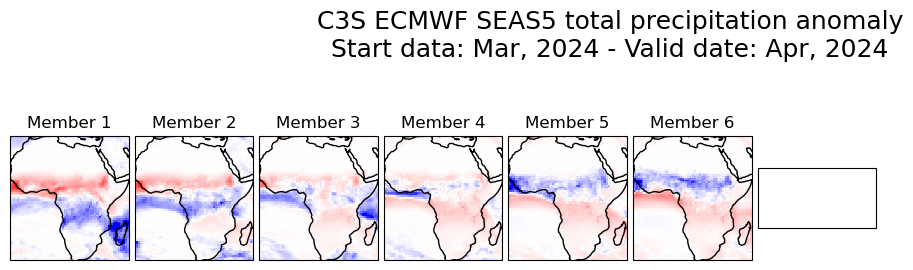

In [63]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath
import matplotlib.pyplot as plt

# Select a leadtime to visualise
lead_time = 2

# Define figure and spacing between subplots
fig = plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace=0.15, wspace = 0.05)

new_date_format = seasonal_march_Africa['time'].dt.strftime('%b, %Y')

# Define overall title
plt.suptitle('C3S ECMWF SEAS5 total precipitation anomaly'
             + os.linesep + 
             f'Start data: {str(new_date_format[0].data)}' 
             + f' - Valid date: {str(new_date_format[lead_time-1].data)}'
             , fontsize=18)

# Define each subplot looping through the ensemble members
for n in np.arange(51):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 10, n + 1, projection=ccrs.PlateCarree())
    # Plot data
    im = ax.pcolormesh(seasonal_march_Africa.longitude.values, seasonal_march_Africa.latitude.values, 
                       seasonal_march_Africa[n,lead_time-1,:,:], cmap='bwr_r', vmin=-350, vmax=350)
    ax.set_title(f'Member {n+1}') # Set subplot title
    ax.coastlines(color='black') # Add coastlines
    # Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
    ax.set_extent([sub[1],sub[3],sub[2],sub[0]], crs=ccrs.PlateCarree())

# Create a colour bar at the bottom of the fugure
fig.subplots_adjust(bottom=0.0)
# Add axis to make space for colour bar (left, bottom, width, height)
cbar_ax = fig.add_axes([0.3, 0.05, 0.5, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Total precipitation anomaly (mm)')

# Save the figure
fig.savefig('TotalPrecAnomalyForecastAfrica.png')

In [73]:
import cfgrib


OSError: cannot load library '/opt/homebrew/lib/libeccodes.dylib': dlopen(/opt/homebrew/lib/libeccodes.dylib, 0x0002): tried: '/opt/homebrew/lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libeccodes.dylib' (no such file), '/opt/homebrew/lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/opt/homebrew/Cellar/eccodes/2.35.0/lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/Cellar/eccodes/2.35.0/lib/libeccodes.dylib' (no such file), '/opt/homebrew/Cellar/eccodes/2.35.0/lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')).  Additionally, ctypes.util.find_library() did not manage to locate a library called '/opt/homebrew/lib/libeccodes.dylib'

In [65]:
nairobi_data = seasonal_march_Africa.sel(latitude=-1.2921, longitude=36.8219, method="nearest")
nairobi_data

<xarray.DataArray 'tprate' (time: 6, number: 51)> Size: 2kB
array([[-1.91119142e+01, -5.06691922e+01, -3.22520235e+00,
        -6.38633380e+00, -3.68899013e+01,  3.63564862e+01,
        -3.95376866e+01, -3.51337172e+01,  1.00740898e+02,
        -2.36239565e+01, -4.14019436e+01, -3.63047562e+00,
        -9.81764741e+00, -3.78625571e+01, -2.71903612e+01,
        -2.06519526e+01, -2.74335252e+01, -3.52958265e+01,
        -1.12496129e+01, -3.90513587e+01, -2.75686163e+01,
         2.72783651e+01, -3.81597575e+01, -1.19250684e+01,
         1.45798029e+01, -2.57583957e+01, -1.93820964e+01,
        -4.01591056e+01, -1.55995459e+01, -4.27528545e+01,
        -4.63462774e+01,  1.87946449e+01, -3.14592396e+01,
        -2.38671205e+01, -2.39481751e+01, -3.62144459e+01,
         6.79855632e+00, -3.75383385e+01,  6.70491812e+01,
        -2.59475232e+01, -5.06244114e+00, -4.25189462e+00,
        -1.08173215e+01,  2.33129479e-01, -5.14349579e+00,
         4.74517179e+00, -2.97300737e+01, -4.09966703e+01,
         1.06081250e+01, -3.91594316e+01, -1.41135440e+01],
       [ 1.42565099e+02,  9.42565262e+01,  2.23998006e+02,
         2.04274708e+02,  7.81806868e+01,  1.47293287e+02,
         1.67016586e+02,  7.09938410e+01,  1.81417296e+02,
...
        -5.02369007e+01, -2.47857399e+01, -5.44247244e+01,
        -4.99126821e+01, -3.92675044e+01, -5.08583197e+01,
        -4.74270061e+01, -4.27258363e+01, -5.54514167e+01],
       [ 8.85194085e+00, -5.22092306e+01, -3.59442637e+01,
        -4.53466034e+01, -5.51542163e+01, -4.31040913e+01,
        -5.13446476e+01, -4.90210809e+01, -2.58664686e+01,
        -3.33775330e+01, -3.34315695e+01, -5.25604674e+01,
        -5.39113783e+01, -4.57518766e+01, -5.17769391e+01,
        -5.37762872e+01, -4.49143119e+01, -3.05136020e+01,
        -5.47759612e+01, -2.80279260e+01, -5.57756353e+01,
        -4.48332572e+01, -1.77069669e+01, -2.91626911e+01,
        -4.70757693e+01, -5.60998539e+01, -3.65927009e+01,
        -4.22124901e+01, -1.19883605e+00, -5.23173035e+01,
        -4.71027875e+01, -2.19218088e+01, -5.47219248e+01,
        -2.83251264e+01, -1.70044933e+01, -4.16451076e+01,
        -1.28707060e+01, -3.60793548e+01, -4.82375526e+01,
        -4.90751174e+01, -4.71027875e+01, -3.46744075e+01,
        -3.74302656e+01, -3.81327393e+01, -5.26415221e+01,
        -4.36444557e+01, -5.54514167e+01, -5.60998539e+01,
        -4.14382175e+00, -5.00747914e+01, -4.71568239e+01]])
Coordinates:
    latitude   float32 4B -1.5
  * number     (number) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 48B 2024-03-01 2024-04-01 ... 2024-08-01
    longitude  float32 4B 36.5
Attributes:
    unit:       mm
    long_name:  Total precipitation anomaly

In [66]:
df = nairobi_data.to_dataframe()

In [70]:
df.to_csv('nairobi_data.csv')